In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.neighbors import NearestNeighbors

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("data_reduce_filled.xlsx")

In [5]:
# Polllution variables

pollution = [
    'Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]',
    'Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]',
    'Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]',

    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
    'Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]',
    'Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]',

    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]',

    'Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]',

    'CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD]',

    'Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE]',
    'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE]',

    'Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE]',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE]',

    'Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD]',
    'Carbon intensity of electricity (gCO2/kWh)'
]

In [6]:
pollution_data = data[pollution]

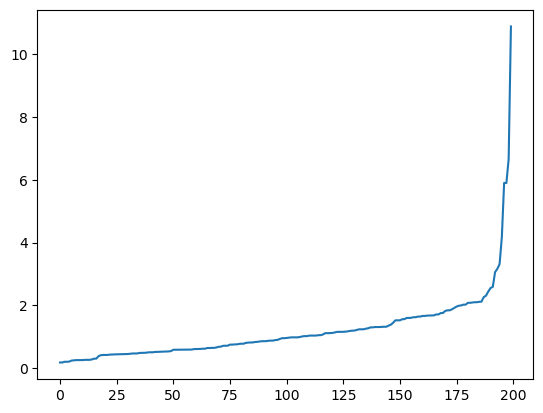

In [12]:
# standardization + KNN to find eps for DBSCAN

df = StandardScaler().fit_transform(pollution_data)

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [23]:
# dbscan outliers
fit = DBSCAN(eps=3, min_samples=7).fit(df)
outliers_ = pd.DataFrame(df) 
outliers = outliers_[fit.labels_== -1]
print(Counter(fit.labels_))


Counter({0: 191, -1: 9})


In [24]:
outliers

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
24,0.848870,0.572930,0.728228,0.597351,0.604467,0.484867,0.611421,0.781740,-0.519562,5.986217,4.459137,3.118092,3.318771,-0.261260,-1.394965
38,0.301824,0.097174,0.387647,0.609392,0.653361,0.491371,-0.582847,11.942127,2.432925,5.974851,9.516533,9.148669,10.807978,0.658286,0.721486
84,-0.126064,-0.315147,0.417787,0.436814,0.467095,0.432836,0.103749,3.069917,0.624966,9.246931,6.091934,5.004274,5.036372,-0.085575,1.106510
97,-1.466598,-1.317894,-1.767352,-1.492402,-0.576498,-3.410941,-0.601530,-0.168873,-0.267438,-0.308288,-0.329081,-0.221964,-0.282426,-0.326563,-1.264515
148,0.670132,0.855944,0.517249,0.609392,0.653361,0.491371,-0.961175,2.122890,1.845253,0.607879,0.936576,5.131980,0.915520,1.353554,-0.214099
163,-1.745538,-1.342292,-2.246576,-3.156280,-2.279426,-5.213315,-0.046073,-0.184650,-0.292456,0.140163,0.297934,-0.101567,0.141557,-0.388913,1.300404
180,0.962613,1.097481,0.767409,0.609392,0.653361,0.491371,-1.059261,-0.212618,2.165761,-0.375517,-0.361057,-0.311727,-0.321472,5.498991,0.470801
183,0.959904,1.095041,0.767409,0.609392,0.653361,0.491371,-1.073273,-0.089257,5.325250,-0.249535,-0.287222,0.272105,-0.259326,3.252456,0.582448
189,0.962613,1.097481,0.767409,0.609392,0.653361,0.491371,-0.711831,5.739460,0.372944,3.521466,4.911739,5.456623,5.133680,-0.007077,-0.042356


In [38]:
data.loc[[163]]

,Country Code,Country Name,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE],...,Exports of goods and services (current US$) [NE.EXP.GNFS.CD],Imports of goods and services (current US$) [NE.IMP.GNFS.CD],Final consumption expenditure (current US$) [NE.CON.TOTL.CD],"GDP, PPP (constant 2017 international $) [NY.GDP.MKTP.PP.KD]",GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]","Population, total [SP.POP.TOTL]","Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]",Income Group
163,SSD,South Sudan,0.0,0.0,0.0,6.17317,4.68117,12.287594,28.65,57319.999695,...,1.230879e+11,1.275847e+11,2.993175e+11,9.237869e+11,4.133865,9.743384e+11,28.273132,10395329,7.85,L
